In [2]:
!!pip install keras pydot graphviz


['Requirement already satisfied: keras in /usr/local/lib/python3.10/dist-packages (3.4.1)',
 'Requirement already satisfied: pydot in /usr/local/lib/python3.10/dist-packages (3.0.2)',
 'Requirement already satisfied: graphviz in /usr/local/lib/python3.10/dist-packages (0.20.3)',
 'Requirement already satisfied: absl-py in /usr/local/lib/python3.10/dist-packages (from keras) (1.4.0)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from keras) (1.26.4)',
 'Requirement already satisfied: rich in /usr/local/lib/python3.10/dist-packages (from keras) (13.9.3)',
 'Requirement already satisfied: namex in /usr/local/lib/python3.10/dist-packages (from keras) (0.0.8)',
 'Requirement already satisfied: h5py in /usr/local/lib/python3.10/dist-packages (from keras) (3.12.1)',
 'Requirement already satisfied: optree in /usr/local/lib/python3.10/dist-packages (from keras) (0.13.0)',
 'Requirement already satisfied: ml-dtypes in /usr/local/lib/python3.10/dist-packages

# Import the libraries


In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt


# Load MINST data:

In [4]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# first 12 images

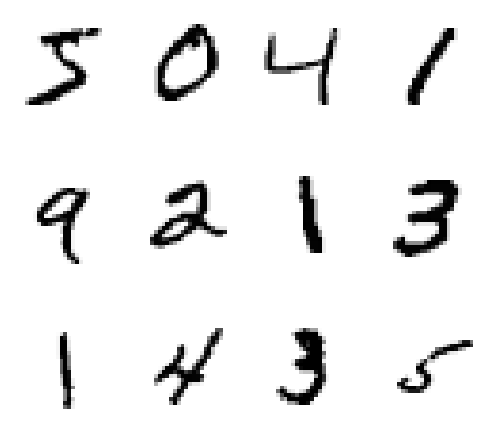

In [5]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()


# Flattening 2 dimensional images to one dimensional:

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')


# Converting pixel integer values [0-255] to float values [0-1]

In [7]:
X_train /= 255
X_valid /= 255


In [8]:
print(X_train.shape)
print(X_valid.shape)

(60000, 784)
(10000, 784)


# Converting training and validation labels from integer values to one-hot encoding

In [9]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)


In [10]:
print(y_train.shape)
print(y_valid.shape)

(60000, 10)
(10000, 10)


# Designing your first neural network architecture!

In [11]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# structure of your network

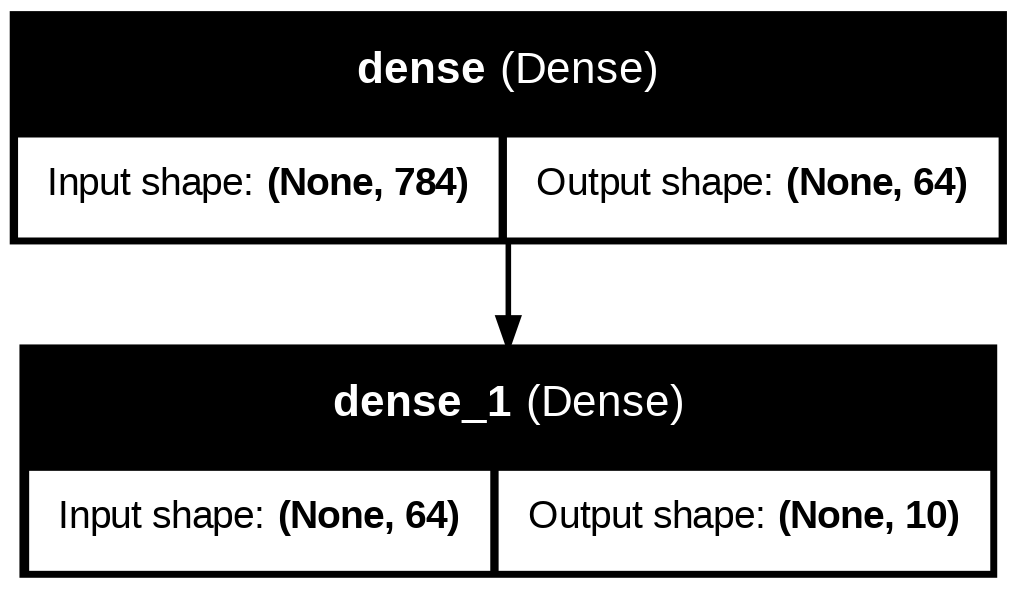

In [12]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
# Change 'lr' to 'learning_rate' in the SGD optimizer
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1219 - loss: 0.0930 - val_accuracy: 0.1350 - val_loss: 0.0924
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1369 - loss: 0.0922 - val_accuracy: 0.1481 - val_loss: 0.0918
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1517 - loss: 0.0917 - val_accuracy: 0.1693 - val_loss: 0.0913
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1723 - loss: 0.0912 - val_accuracy: 0.1910 - val_loss: 0.0908
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1964 - loss: 0.0907 - val_accuracy: 0.2161 - val_loss: 0.0903
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2238 - loss: 0.0902 - val_accuracy: 0.2439 - val_loss: 0.0899
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2545 - loss: 0.0898 - val_accuracy: 0.2744 - val_loss: 0.0895
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2811 - loss: 0.0894 - val_accu

In [15]:
model.evaluate(X_valid, y_valid)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8518 - loss: 0.0296


[0.026737436652183533, 0.8695999979972839]